In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm, trange
from matplotlib import pyplot as plt
import sklearn
from sklearn.svm import SVR, OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, VarianceThreshold

In [2]:
!pip install rdkit-pypi==2022.3.1.1
!pip install molplotly
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
import plotly.express as px
import molplotly
#------------------- progress bar
from tqdm import tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.7/22.7 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/39/40/c0d86942ba668d975570a0fbd7fe4224445198a90a64ec6f0c1cd3bf2527/molplotly-1.1.8.tar.gz (from https://pypi.org/simple/molplotly/): Requested molplotly from https://files.pythonhosted.org/packages/39/40/c0d86942ba668d975570a0fbd7fe4224445198a90a64ec6f0c1cd3bf2527/molplotly-1.1.8.tar.gz has inconsistent version: expected '1.1.8', but metadata has '1.1.7'
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.8 MB/s eta 0:00:00
  Created wheel for molplotly: filename=molplotly-1.1.7-py3-none-any.whl size=14044 sha256=d09e116de8ee4162de91ba799917bc1699a5f3a6d37e813713871ece9704a485
  Stored in directory: /root/.cache/pip/

In [3]:
! gdown --id 15_53k_O6oSfQ5bDKJl-jIGmzVbpVzFW3

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15_53k_O6oSfQ5bDKJl-jIGmzVbpVzFW3
To: /content/explor2_predictions.xlsx
100% 12.3k/12.3k [00:00<00:00, 25.5MB/s]


In [4]:
dataset = pd.read_excel("explor2_predictions.xlsx")
#dataset

In [5]:
dataset = dataset.drop(index=list(range(0, 13)))

In [6]:
dataset['label'] = np.arange(1,len(dataset)+1)

In [7]:
new_df = dataset[dataset['Leverage'] >= 0]
dataset_filtered=  new_df

In [8]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataset,'smiles', 'structure') #Agrega una columna de estructura al dataframe

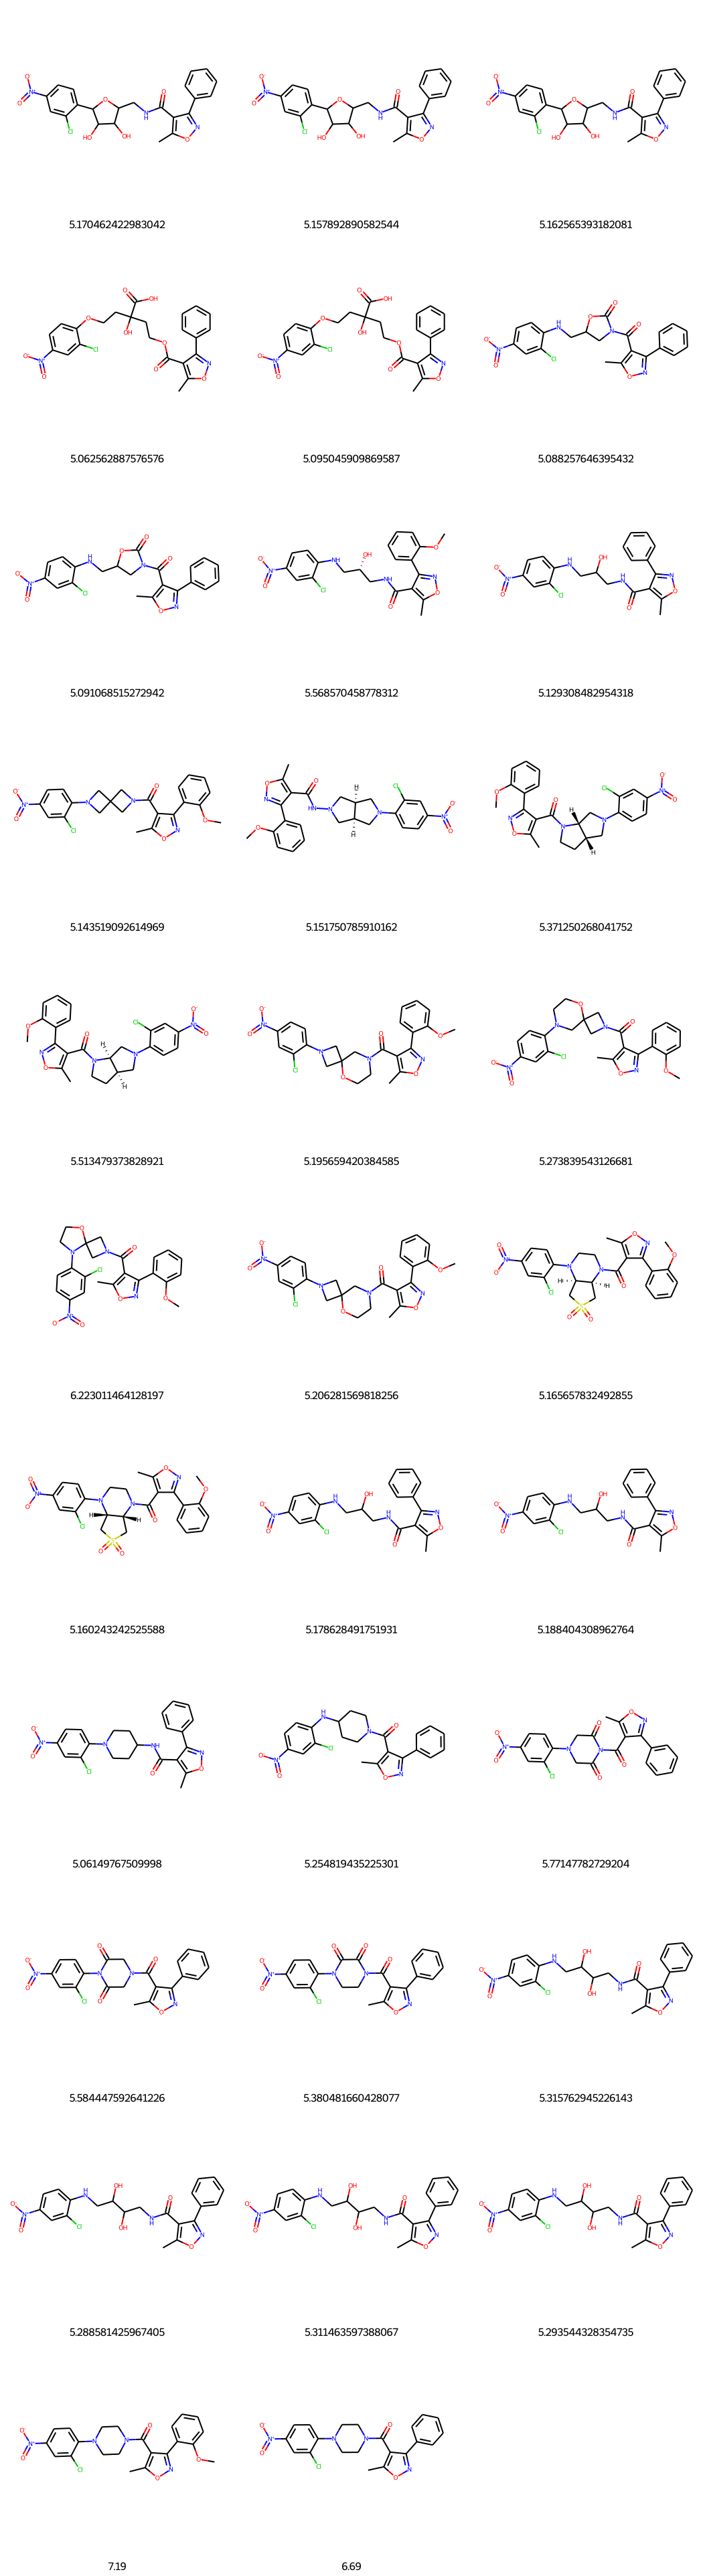

In [9]:
# visualizamos las esctructuras de los compuestoa junto a su actividad cálculada
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset["structure"]]#[:20]
                     , maxMols=100,
                     legends=[str(x) for x in dataset.pred], subImgSize=(350,350), molsPerRow=3)

In [10]:
import plotly.express as px

fig = px.line(dataset, x="name", y="pred", title='pred',
              hover_name='name',
              #symbol_map='Leverage',
              hover_data='Leverage',
               template="plotly_white")
#fig.show()
app_marker = molplotly.add_molecules(fig=fig,
                                         df=dataset,
                                         smiles_col='smiles',
                                         title_col='Leverage',
                                         #color_col='G1'
                                        )
#fig_pca.show()
#app_marker.run_server(mode='inline', port=8060, height=1000)
app_marker.run(port=8060)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

In [11]:
# prompt: repite la grpafica de la celda pasada pero pon una linea en 0 en el eje x

fig = px.scatter(dataset, x="Leverage", y="pred", title='pred',
              #hover_name='name',
              #symbol_map='Leverage',
              hover_data='label',
                  template="plotly_white")
fig.add_shape(type="line",
    x0=0,
    y0=min(dataset['pred']),
    x1=0,
    y1=max(dataset['pred']),
    line=dict(color="green", width=1)
)
#fig.show()
app_marker = molplotly.add_molecules(fig=fig,
                                         df=dataset,
                                         smiles_col='smiles',
                                         title_col='name',
                                         #color_col='G1'
                                        )
#fig_pca.show()
#app_marker.run_server(mode='inline', port=8060, height=1000)
app_marker.run(port=8060)


/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

Enumeramos las estrucutras más importantes

actividad predicha pIC50: 5.568570458778312
ecp145


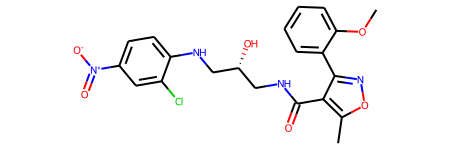

In [12]:
print('actividad predicha pIC50: ' + str(dataset.pred[20]))#[n] n = label-1
print(dataset.name[20])
dataset.structure[20]

actividad predicha pIC50: 5.143519092614969
ecp147


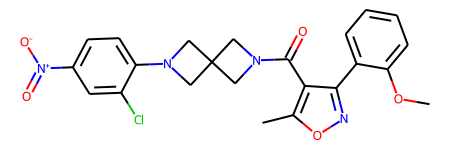

In [13]:
print('actividad predicha pIC50: ' + str(dataset.pred[22]))#[n] n = label-1
print(dataset.name[22])
dataset.structure[22]

actividad predicha pIC50: 5.513479373828921
ecp150


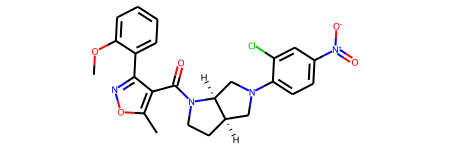

In [14]:
print('actividad predicha pIC50: ' + str(dataset.pred[25]))#[n] n = label-1
print(dataset.name[25])
dataset.structure[25]

actividad predicha pIC50: 6.223011464128197
ecp153


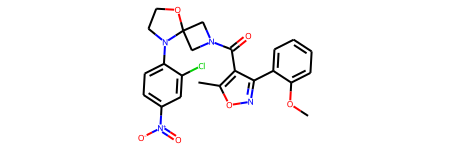

In [15]:
print('actividad predicha pIC50: ' + str(dataset.pred[28]))#[n] n = label-1
print(dataset.name[28])
dataset.structure[28]

actividad predicha pIC50: 5.77147782729204
ecp168


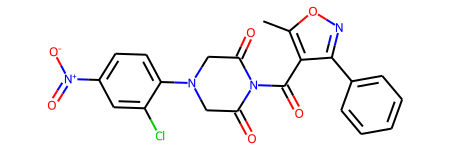

In [16]:
print('actividad predicha pIC50: ' + str(dataset.pred[36]))#[n] n = label-1
print(dataset.name[36])
dataset.structure[36]